In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
from utils import clustering, parse_to_ES, processing, convert_response_to_df
from esclient import _get_client

In [2]:
def pipeline(nl):
    print("wit")
    cluster = clustering(nl)
    print("done wit")
    body = parse_to_ES(cluster)

    es = _get_client()
    print("done client")
    response = es.search(index='real_estate', body=body)
    print("done response")
    # them phan preprocessing vao day de tra ve ketqua
    # hien tai de trong de debug
    return cluster, body, response


In [3]:
# la ham processing tra ve kq 
# opened to play with df
def processing_test(response, cluster):
    if cluster['intent'] == 'query':
        result = {}
        agg = response['aggregations']
        
        result['total'] = response['hits']['total']
        result['min'] = agg['min']['value']
        result['max'] = agg['max']['value']
        result['avg'] = agg['avg']['value']
        
        return result
    elif cluster['intent'] == 'groupby':
        
        df = convert_response_to_df(response)
        obj = cluster['Object']
        groupby = cluster['groupby']
        x = df.groupby([groupby], as_index=False).mean()
        x_a = list(x[groupby])
        y_a = list(x[obj])
        plt.figure(figsize=(25, 25))
        plt.plot(x_a, y_a)
        return df, obj, groupby

In [4]:
txts = ['draw the price chart of Apartment in HaNoi, according district',
       'tell me the avg price Landhouse with 2 rooms in HaNoi']

In [5]:
cluster, body, response = pipeline(txts[0])

wit
{
    "text": "draw the price chart of Apartment in HaNoi, according district",
    "intents": [
        {
            "id": "353178916316175",
            "name": "groupby",
            "confidence": 0.9981
        }
    ],
    "entities": {
        "Object:groupby": [
            {
                "id": "4068291899952567",
                "name": "Object",
                "role": "groupby",
                "start": 54,
                "end": 62,
                "body": "district",
                "confidence": 0.9705,
                "entities": [],
                "value": "normed_district",
                "type": "value"
            }
        ],
        "normed_province:normed_province": [
            {
                "id": "597825701265414",
                "name": "normed_province",
                "role": "normed_province",
                "start": 37,
                "end": 42,
                "body": "HaNoi",
                "confidence": 0.9943,
                "entitie

In [14]:
response

{'took': 457,
 'timed_out': False,
 '_shards': {'total': 5, 'successful': 5, 'skipped': 0, 'failed': 0},
 'hits': {'total': 153591,
  'max_score': 10.198445,
  'hits': [{'_index': 'real_estate_v1',
    '_type': '_doc',
    '_id': 'alnd_pr7908287',
    '_score': 10.198445,
    '_source': {'id': 'alnd_pr7908287',
     'ad_vip_type': 'normal',
     'address': 'Phố Trung Kính, Phường Yên Hòa, Quận Cầu Giấy, Hà Nội',
     'area': 70.0,
     'area_unit': 'm2',
     'bedroom': 2.0,
     'category': 'Cho thuê chung cư',
     'contact_name': 'Bùi Văn Tuấn',
     'currency_unit': 'VND',
     'description': '💥💥Cho thuê căn hộ Home City Trung Kính Complex 2 ngủ, full đồ.\r\nCho thuê căn hộ ở Home City Trung kính Complex 70m2, 2 ngủ , full đồ.\r\n👉 Diện tích : 70m2.\r\n👉 Thiết kế : 2 ngủ, 2 vệ sinh, phòng khách, bếp,....\r\n👉 Nội thất : điều hòa, sàn gỗ, tử lạnh, máy giặt..... đầy đủ mọi thứ. \r\n👉 Căn góc nên rất đẹp.\r\n🍀 Khách thuê chỉ cần dọn đồ đến ở ngay!!!\r\n🍀 View nhìn vào Thành Phố.\r\n💵G

In [6]:
df = convert_response_to_df(response)
obj = cluster['Object']
groupby = cluster['groupby']

In [65]:
df['price_unit'].value_counts()

per month       9921
per m2 month      35
Name: price_unit, dtype: int64

In [31]:
df.columns

Index(['id', 'ad_vip_type', 'address', 'area', 'area_unit', 'bedroom',
       'category', 'contact_name', 'currency_unit', 'description', 'district',
       'floor', 'images', 'legal_document', 'mobile', 'origin_url', 'price',
       'price_unit', 'province', 'province_ascii', 'scrape_date', 'source',
       'start_date', 'street', 'timestamp', 'title', 'type', 'updated_times',
       'ward', 'ad_id', 'ad_type', 'normed_adtype', 'normed_province',
       'normed_district', 'normed_category', 'normed_type', 'project',
       'normed_project', 'direction', 'price_raw', 'entrance', 'area_raw',
       'created_at', 'toilet', 'ad_type_raw', 'address_seller', 'end_date',
       'sector', 'thumbnail_images', 'normed_ad_type', 'total_price',
       'living_area', 'bedroom_unit', 'furniture', 'email', 'phone',
       'developer', 'project_size', 'price_max', 'price_min',
       'balcony_direction', 'area_max'],
      dtype='object')

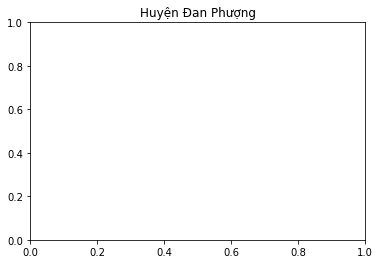

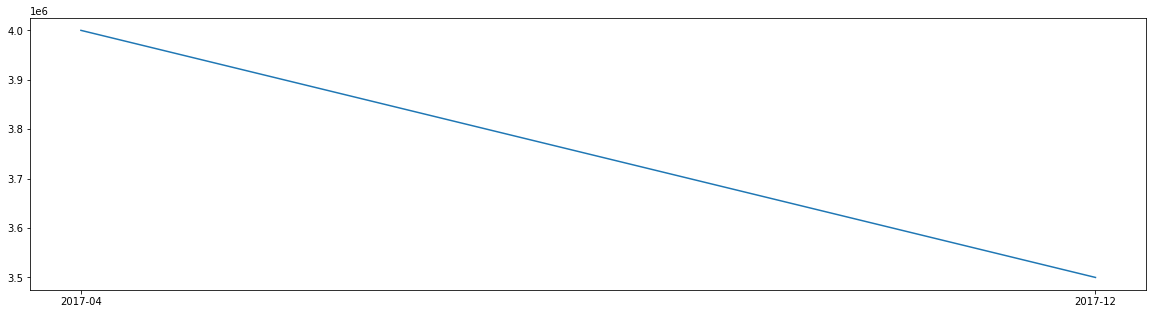

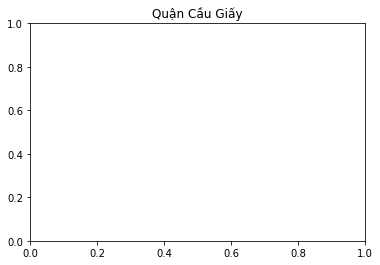

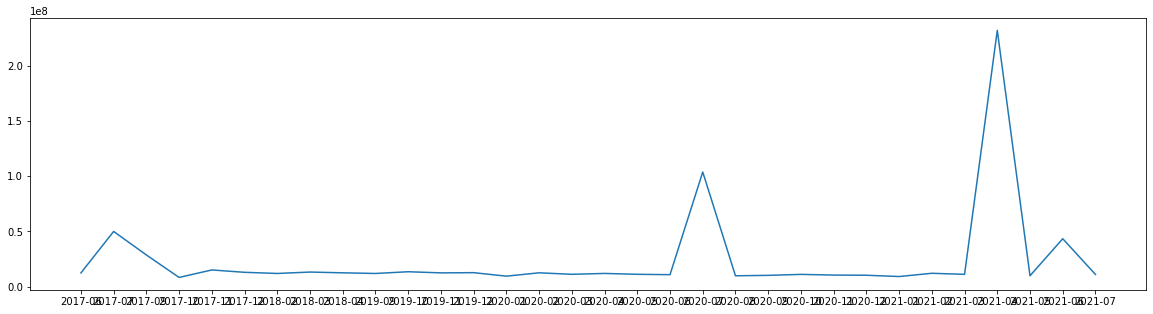

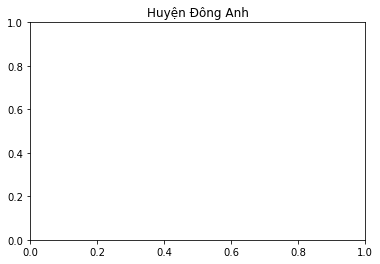

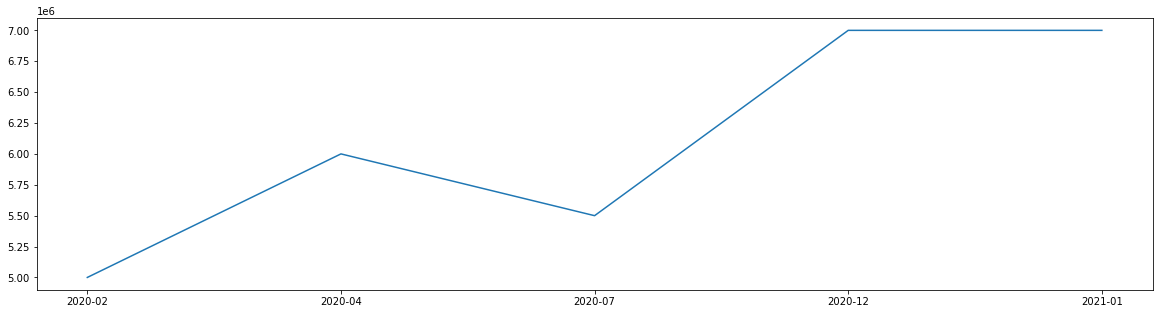

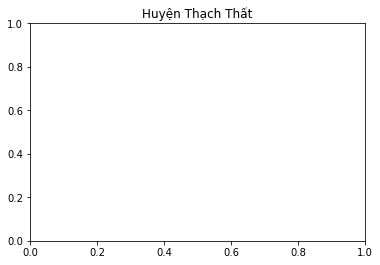

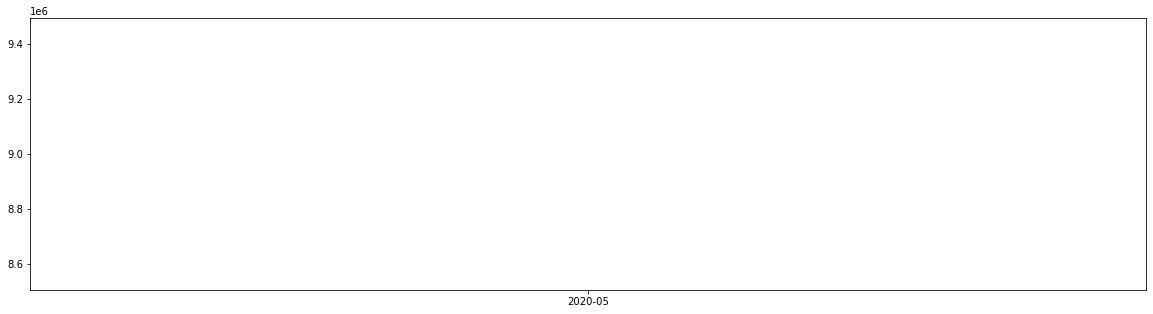

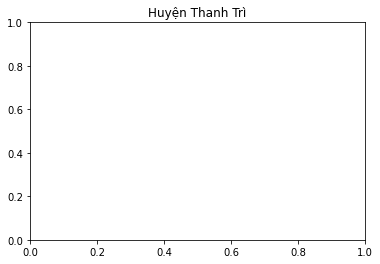

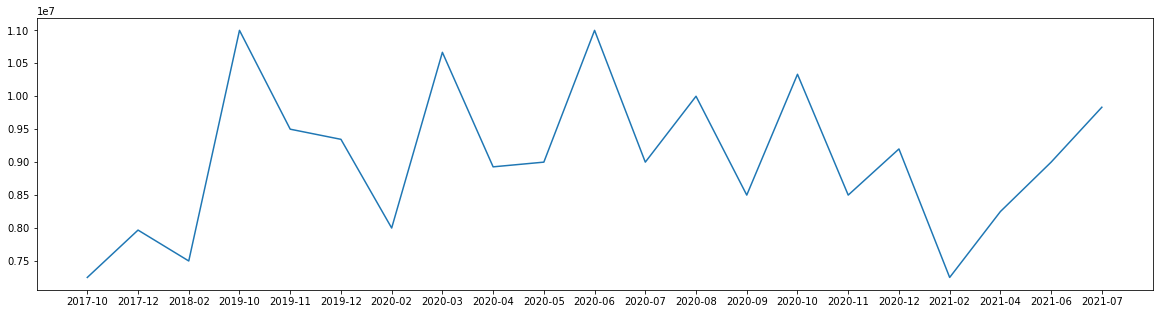

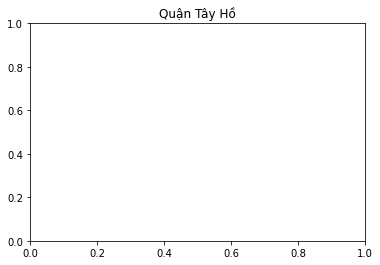

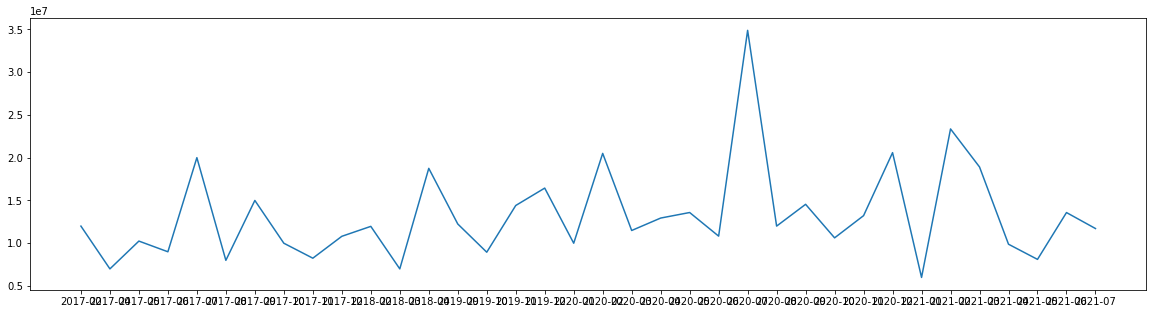

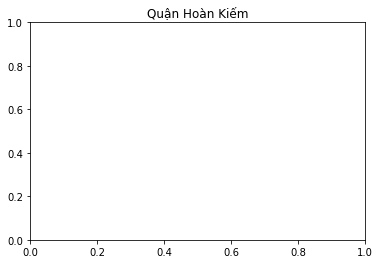

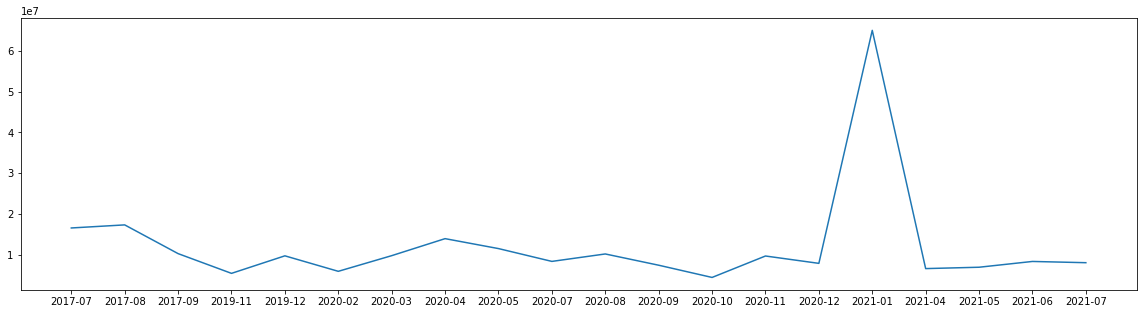

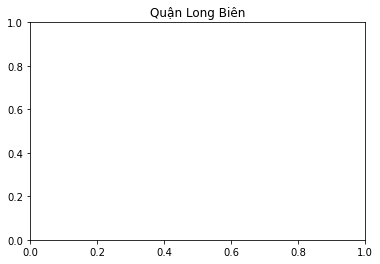

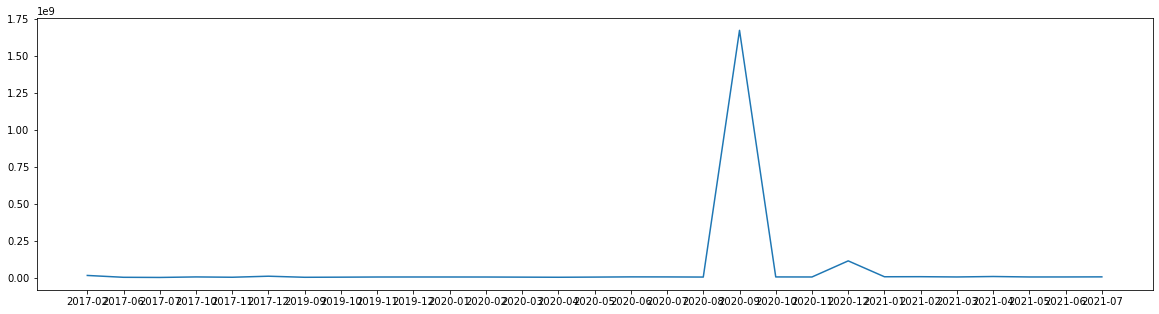

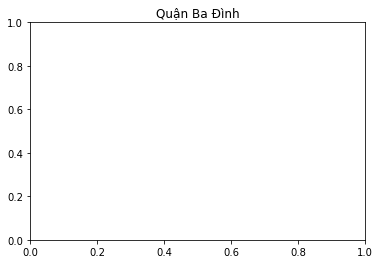

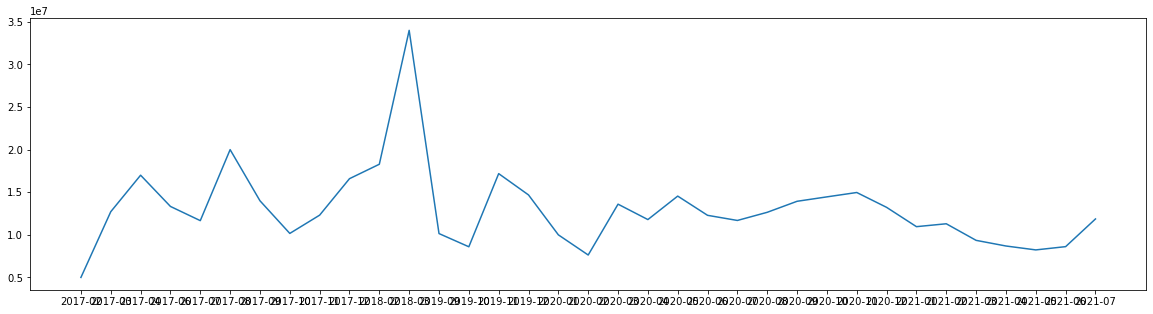

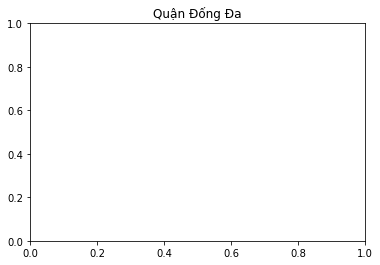

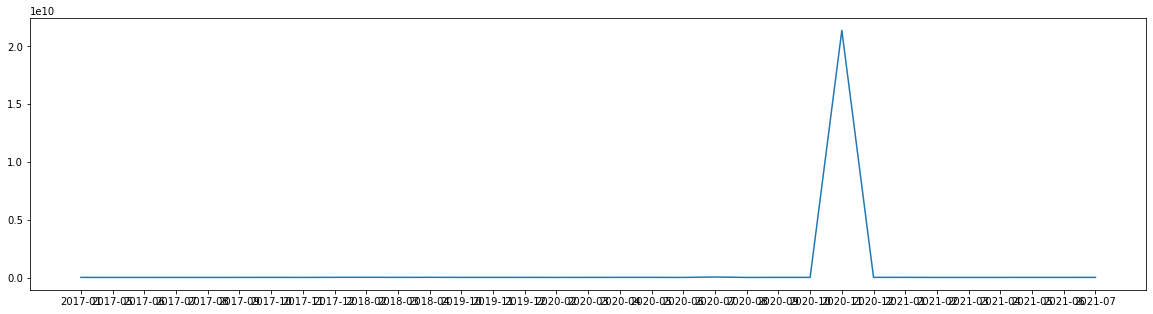

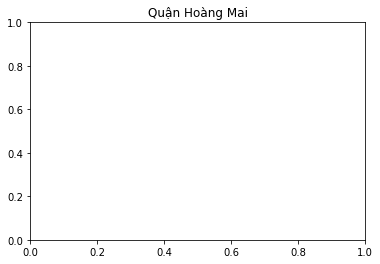

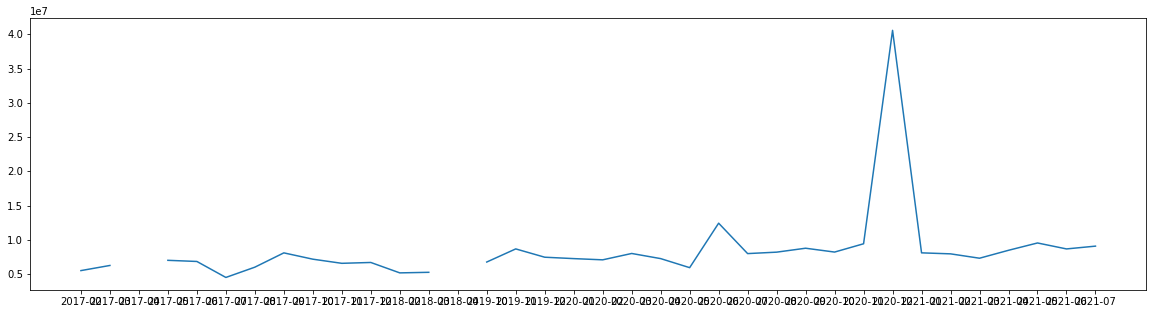

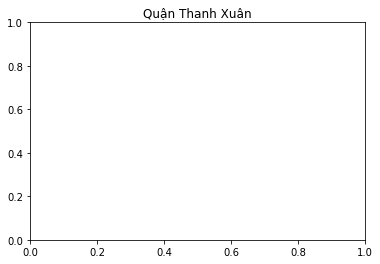

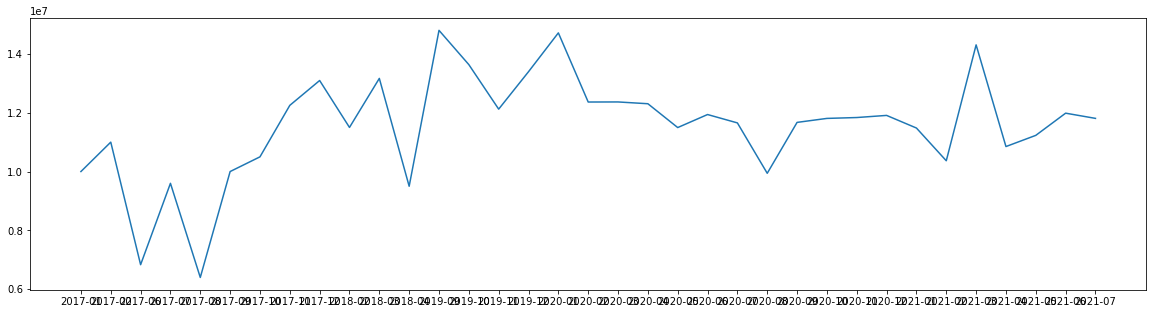

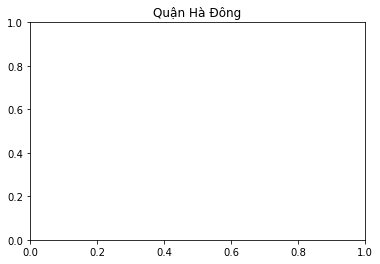

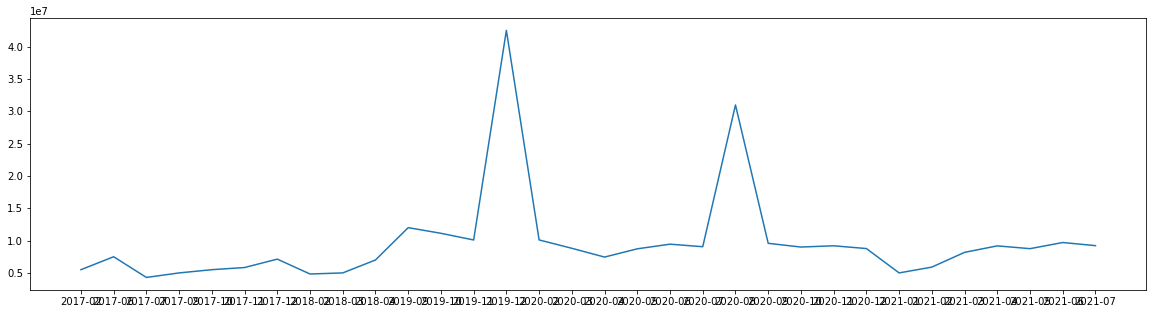

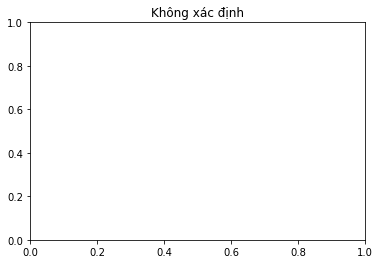

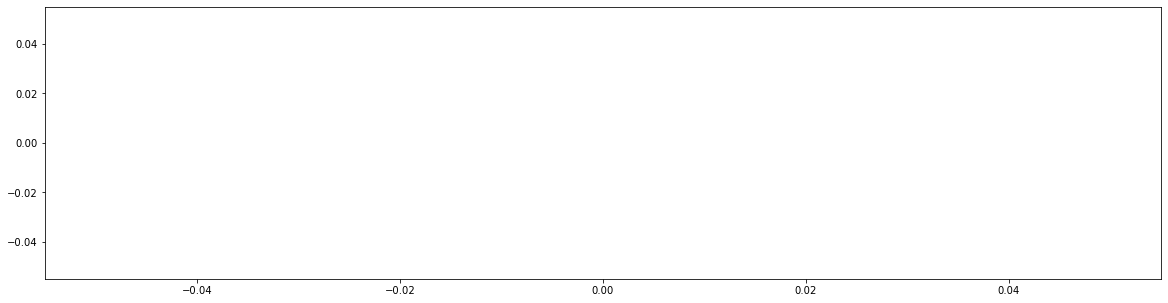

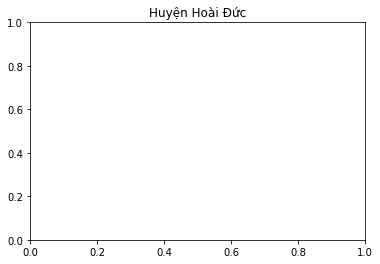

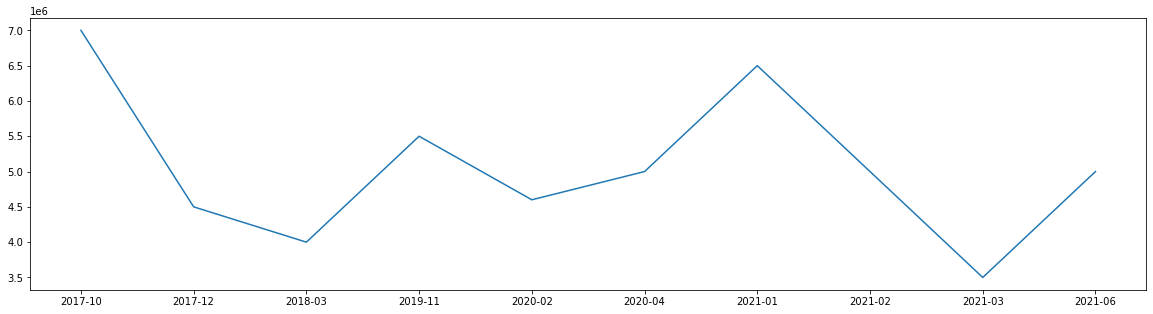

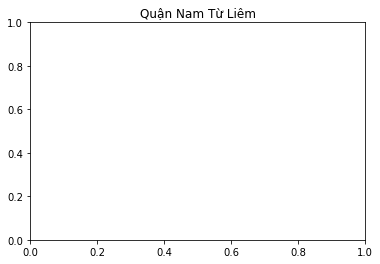

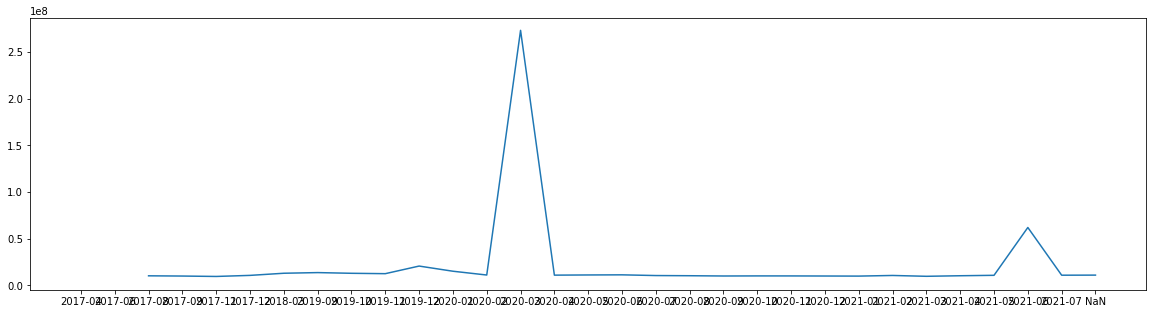

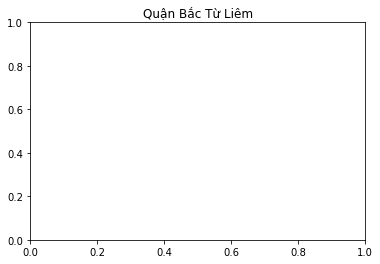

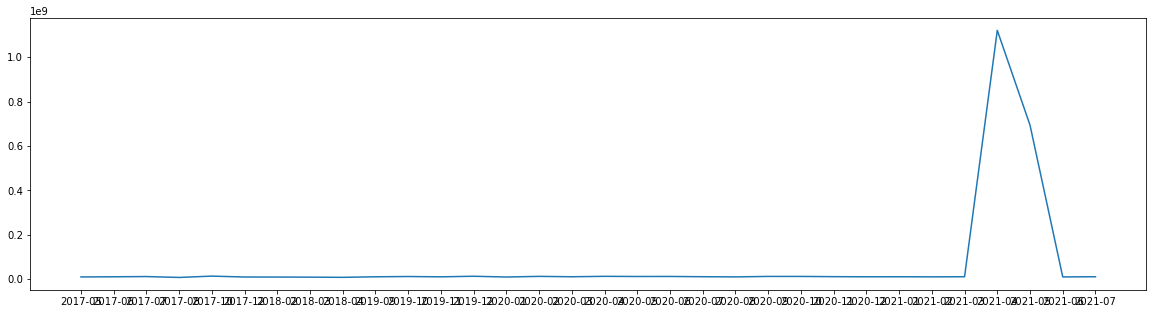

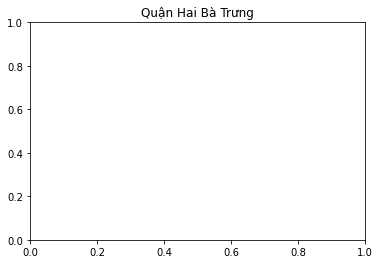

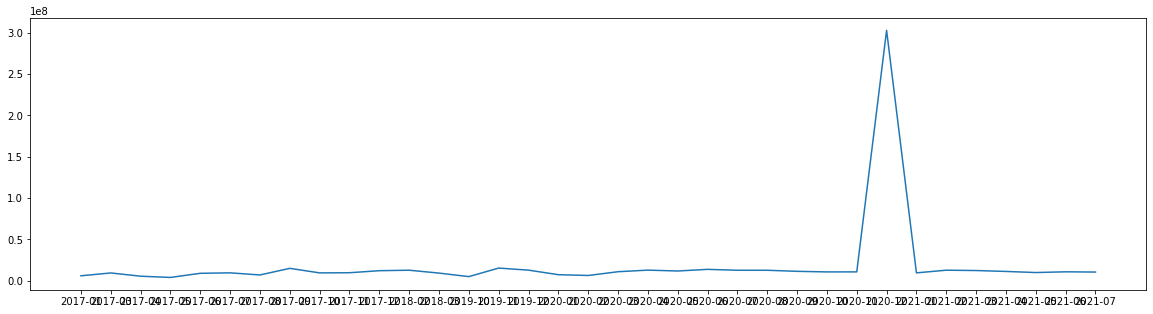

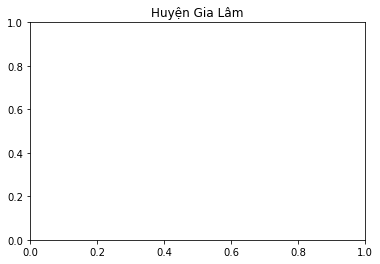

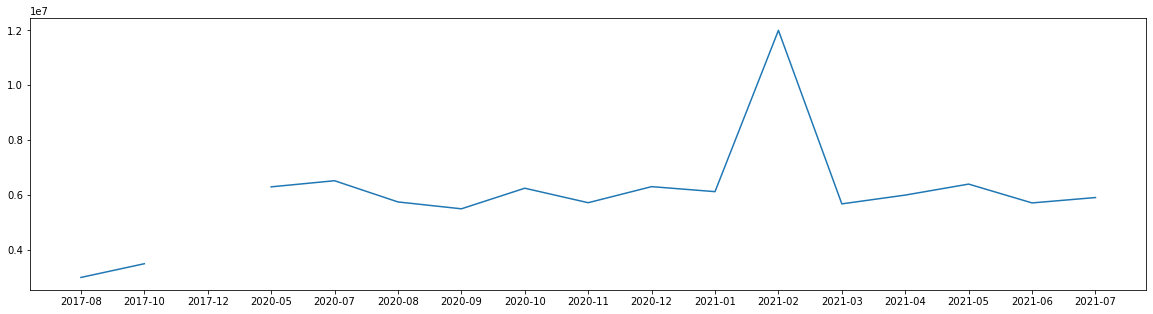

In [71]:
districts = set(df[groupby].values)
date = list(df['start_date'])
date = ['-'.join(x.split('-')[:-1]) if type(x)== str else 'NaN' for x in date]
df['year-month'] = date
for district in districts:
    sub_df = df.loc[df['district']==district]  
    x = sub_df.groupby(['year-month'], as_index=False).mean()
    x_a = list(x['year-month'])
    y_a = list(x[obj])
    plt.title(str(district))
    plt.figure(figsize=(20, 5))
    plt.plot(x_a, y_a)
    plt.show()
    # return df, obj, groupby

In [52]:
sub_df = df.loc[df['district']==districts[2]]

In [53]:
sub_df.head(2)

id ad_vip_type  \
2   alnd_pr7868753      normal   
12  alnd_pr7946034      normal   

                                              address   area area_unit  \
2   Đường Phạm Hùng, Phường Mỹ Đình 2, Quận Nam Từ...  100.0        m2   
12  Đường Hàm Nghi, Phường Mỹ Đình 1, Quận Nam Từ ...   70.0        m2   

    bedroom           category  contact_name currency_unit  \
2       3.0  Cho thuê chung cư  phan anh đức           VND   
12      2.0  Cho thuê chung cư  TRẦN VĂN ĐẠO           VND   

                                          description  ... bedroom_unit  \
2   cho thuê chung cư FLC 36 phạm hùng mỹ đình\r\n...  ...          NaN   
12  Cho thuê căn hộ cao cấp toạ lạc tại HD Mon – H...  ...          NaN   

    furniture email phone developer project_size  price_max price_min  \
2         NaN   NaN   NaN       NaN          NaN        NaN       NaN   
12        NaN   NaN   NaN       NaN          NaN        NaN       NaN   

   balcony_direction area_max  
2                NaN      NaN  
12               NaN      NaN  

[2 rows x 62 columns]

In [54]:
date = list(sub_df['start_date'])

In [57]:
date

['2021-02-28',
 '2021-04-28',
 '2021-03-01',
 '2021-03-02',
 '2021-03-03',
 '2021-03-03',
 '2021-03-06',
 '2021-03-07',
 '2021-03-08',
 '2021-04-25',
 '2021-04-26',
 '2021-03-19',
 '2021-04-26',
 '2021-05-10',
 '2021-05-05',
 '2021-05-05',
 '2021-03-17',
 '2021-03-22',
 '2021-03-16',
 '2021-05-06',
 '2021-05-14',
 '2021-03-16',
 '2021-04-19',
 '2021-05-14',
 '2021-05-15',
 '2021-05-15',
 '2021-03-30',
 '2021-05-05',
 '2021-05-23',
 '2021-05-27',
 '2021-05-21',
 '2021-03-24',
 '2021-03-24',
 '2021-03-25',
 '2021-04-27',
 '2021-05-27',
 '2021-05-27',
 '2021-05-27',
 '2021-04-01',
 '2021-03-30',
 '2021-05-17',
 '2021-05-26',
 '2021-05-10',
 '2021-01-03',
 '2021-05-15',
 '2021-05-16',
 '2021-01-03',
 '2021-01-25',
 '2021-02-01',
 '2021-02-06',
 '2021-01-08',
 '2021-01-11',
 '2021-02-26',
 '2021-01-24',
 '2021-02-08',
 '2021-01-19',
 '2021-01-19',
 '2020-12-31',
 '2021-06-02',
 '2021-05-27',
 '2018-03-01',
 '2021-02-26',
 '2021-04-17',
 '2021-02-17',
 '2021-02-18',
 '2021-04-09',
 '2021-04-

In [59]:
date = ['-'.join(x.split('-')[:-1]) if type(x)== str else 'NaN' for x in date]

In [61]:
date

['2021-02',
 '2021-04',
 '2021-03',
 '2021-03',
 '2021-03',
 '2021-03',
 '2021-03',
 '2021-03',
 '2021-03',
 '2021-04',
 '2021-04',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-05',
 '2021-05',
 '2021-03',
 '2021-03',
 '2021-03',
 '2021-05',
 '2021-05',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-05',
 '2021-05',
 '2021-03',
 '2021-05',
 '2021-05',
 '2021-05',
 '2021-05',
 '2021-03',
 '2021-03',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-05',
 '2021-05',
 '2021-04',
 '2021-03',
 '2021-05',
 '2021-05',
 '2021-05',
 '2021-01',
 '2021-05',
 '2021-05',
 '2021-01',
 '2021-01',
 '2021-02',
 '2021-02',
 '2021-01',
 '2021-01',
 '2021-02',
 '2021-01',
 '2021-02',
 '2021-01',
 '2021-01',
 '2020-12',
 '2021-06',
 '2021-05',
 '2018-03',
 '2021-02',
 '2021-04',
 '2021-02',
 '2021-02',
 '2021-04',
 '2021-04',
 '2021-03',
 '2021-02',
 '2021-02',
 '2021-04',
 '2021-04',
 '2021-04',
 '2021-04',
 '2021-04',
 '2021-04',
 '2021-04',
 '2021-02',
 '2021-01',
 '2021-01',
 '2017-12',
 '2017-12',
 '2017-12',
 '20

In [62]:
sub_df['year-month'] = date 

<ipython-input-62-e629ba1a04f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['year-month'] = date


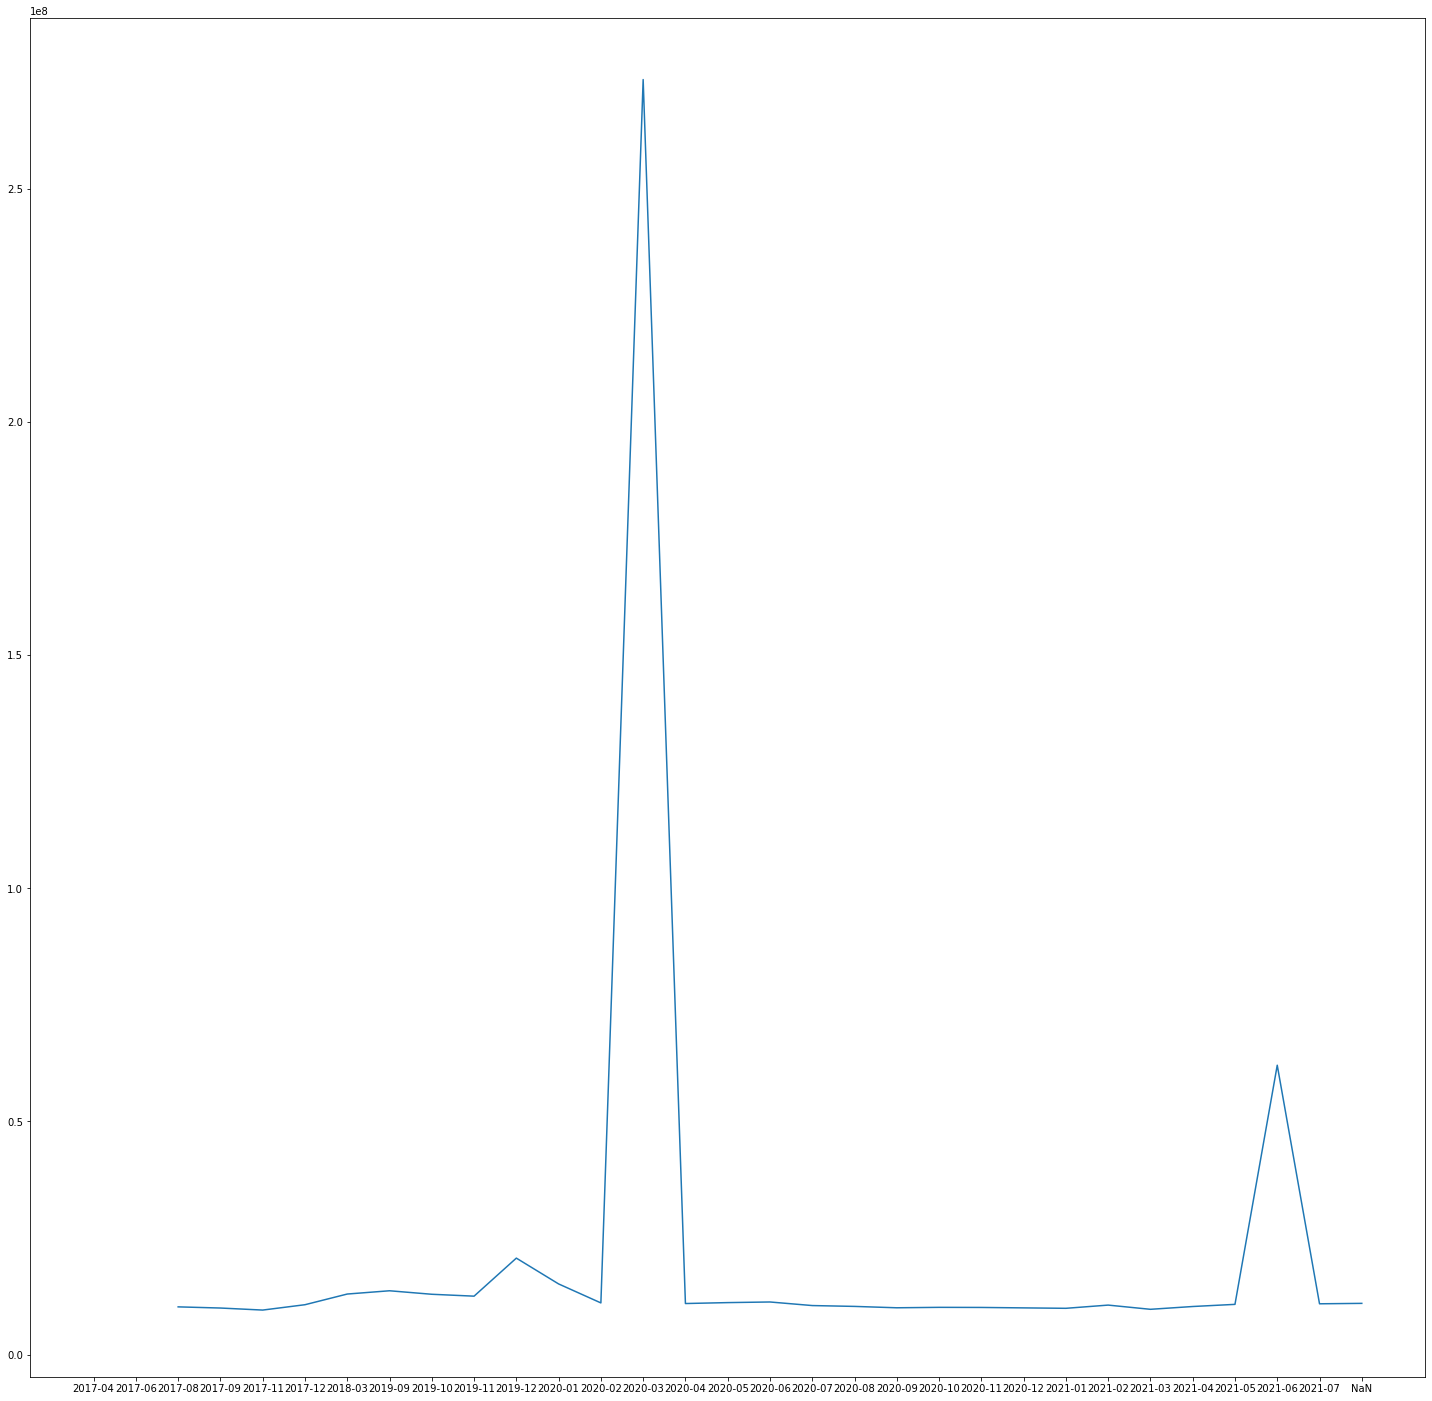

In [63]:
x = sub_df.groupby(['year-month'], as_index=False).mean()
x_a = list(x['year-month'])
y_a = list(x[obj])
plt.figure(figsize=(25, 25))
plt.plot(x_a, y_a)
# return df, obj, groupby

In [11]:
processing_test(response, cluster)

{'total': 701111,
 'min': 0.0,
 'max': 255999998951424.0,
 'avg': 792680584.8760573}

In [ ]:
"draw the price chart of Apartment in HaNoi, according district"

In [16]:
cluster, body, response = pipeline(txts[0])

wit
{
    "text": "draw the price chart of Apartment in HaNoi, according district",
    "intents": [
        {
            "id": "353178916316175",
            "name": "groupby",
            "confidence": 0.9981
        }
    ],
    "entities": {
        "Object:groupby": [
            {
                "id": "4068291899952567",
                "name": "Object",
                "role": "groupby",
                "start": 54,
                "end": 62,
                "body": "district",
                "confidence": 0.971,
                "entities": [],
                "value": "normed_district",
                "type": "value"
            }
        ],
        "normed_province:normed_province": [
            {
                "id": "597825701265414",
                "name": "normed_province",
                "role": "normed_province",
                "start": 37,
                "end": 42,
                "body": "HaNoi",
                "confidence": 0.9943,
                "entities

(                  id ad_vip_type  \
 0     alnd_pr7908287      normal   
 1     alnd_pr7884440      normal   
 2     alnd_pr7868753      normal   
 3     alnd_pr7888795      normal   
 4     alnd_pr7902678      normal   
 ...              ...         ...   
 9995  alnd_pr4323707      normal   
 9996  alnd_pr5401034      normal   
 9997  alnd_pr3806809      normal   
 9998  alnd_pr4526665      normal   
 9999  alnd_pr3980839      normal   
 
                                                 address   area area_unit  \
 0     Phố Trung Kính, Phường Yên Hòa, Quận Cầu Giấy,...   70.0        m2   
 1     Đường Cầu Giấy, Phường Dịch Vọng, Quận Cầu Giấ...  132.0        m2   
 2     Đường Phạm Hùng, Phường Mỹ Đình 2, Quận Nam Từ...  100.0        m2   
 3     Đường Việt Hưng, Phường Giang Biên, Quận Long ...   86.0        m2   
 4     Phố Liễu Giai, Phường Cống Vị, Quận Ba Đình, H...   50.0        m2   
 ...                                                 ...    ...       ...   
 9995  458 Đườn

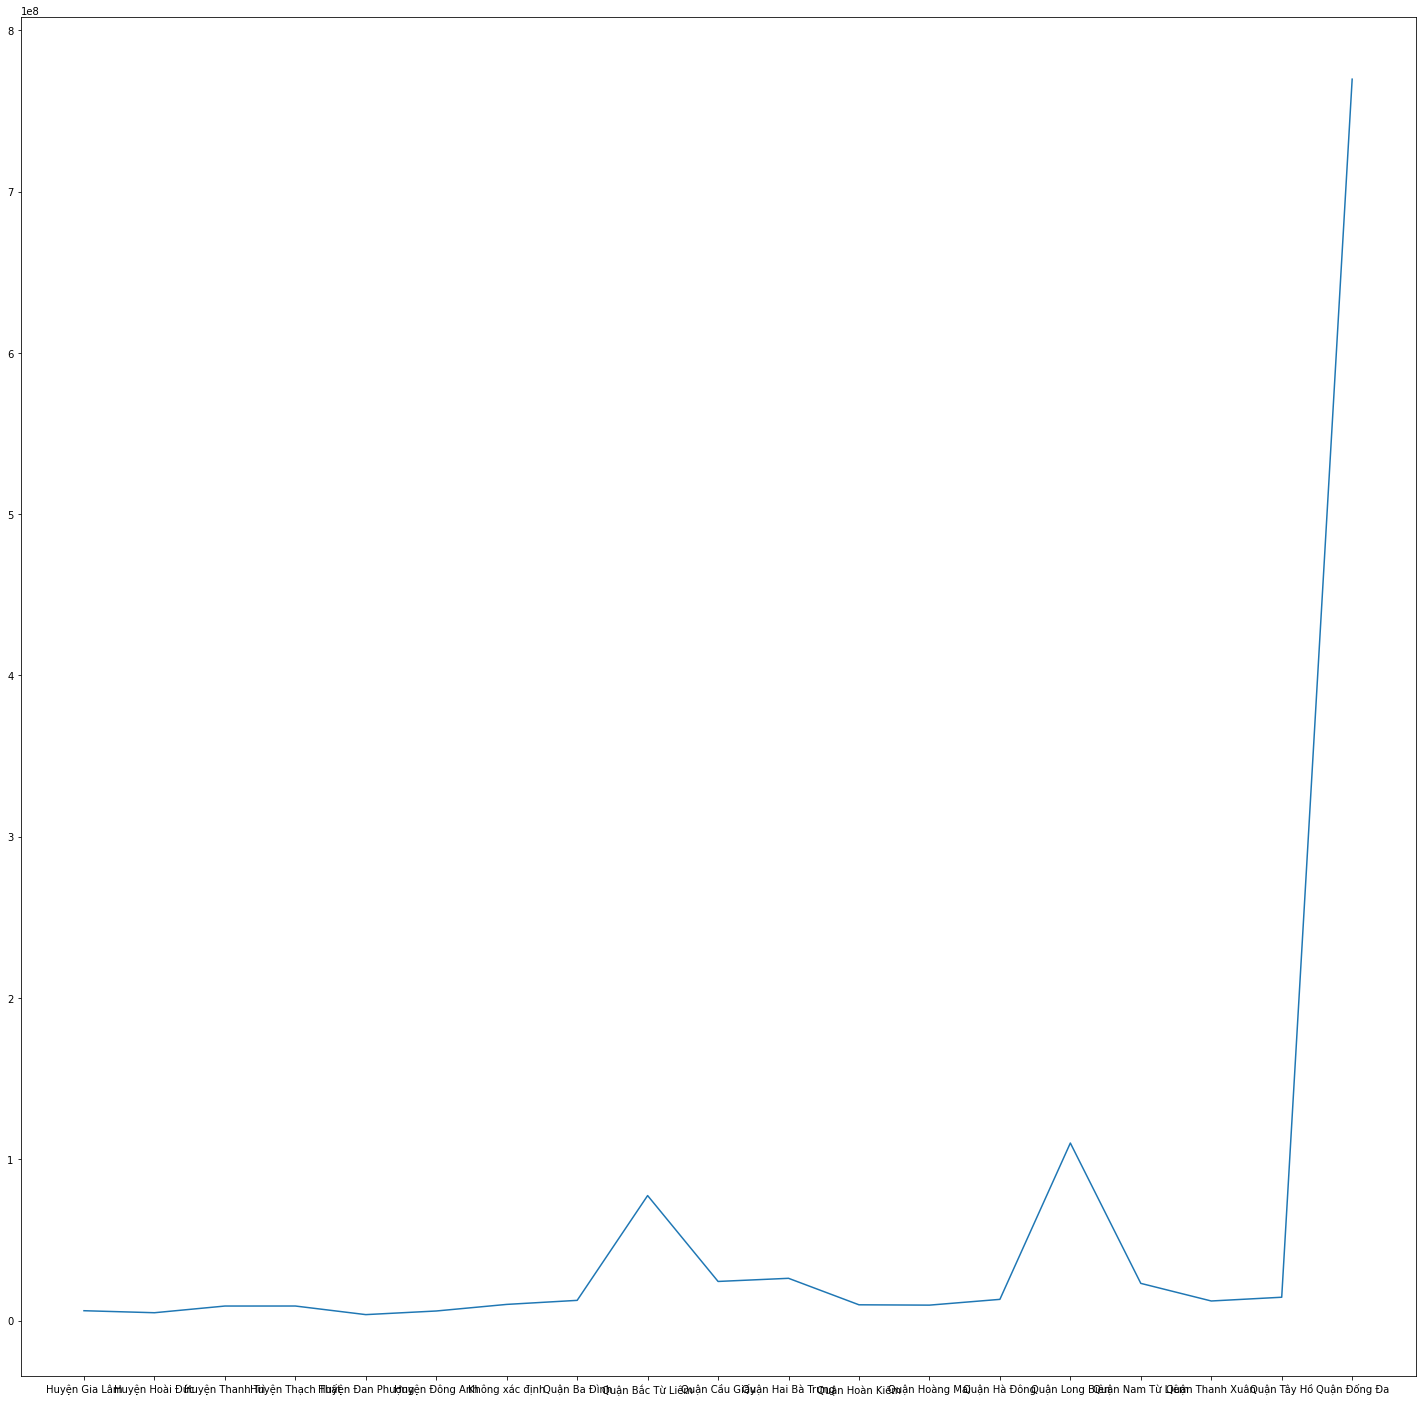

In [17]:
processing_test(response, cluster)